# Inspect TDM File

This notebook allows you to:
- Open a `.tdm` file and its corresponding `.tdx` file.
- Explore the metadata and time histories of the experimental data.
- Visualize specific channels interactively.

In [37]:
import pandas as pd
import tdm_loader as tdm
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

### Main Functions
- Open a window to select the `.tdm` file.
- Load `.tdm` data and store it into a DataFrame variable.

In [38]:
# Function to select a TDM file
def select_tdm_file():
    """
    Opens a dialog to select a TDM file.

    Returns:
        str: Path to the selected TDM file.
    """
    root = Tk()
    root.withdraw()
    root.attributes('-topmost', True)
    file_path = filedialog.askopenfilename(
        title="Select TDM File",
        filetypes=[("TDM Files", "*.tdm;*.TDM")]
    )
    root.destroy()
    return file_path

# Function to load TDM data
def load_tdm_data(tdm_file,fs = 1000):
    """
    Load data from a TDM file.

    Args:
        tdm_file (str): Path to the TDM file.
        fs (int): sampling frequency in Hz (default 1000 Hz).

    Returns:
        tuple: (metadata, DataFrame of channel data).
    """
    try:
        # Open the TDM file
        data = tdm.OpenFile(tdm_file)

        # Extract channel data
        d = {}
        group_index = 0
        channel_index = 0
        while True:
            try:
                channel_name = data.channel_name(group_index, channel_index)
                channel_data = data.channel(group_index, channel_index)
                d[channel_name] = channel_data
                channel_index += 1
            except IndexError:
                break

        # Convert to DataFrame
        df = pd.DataFrame.from_dict(d)

        # Add a time column as the index based on a sampling frequency of 1000 Hz
        fs = 1000  # Sampling frequency in Hz
        time = np.arange(len(df)) / fs
        df['time'] = time
        df = df.set_index('time')
        
        # Extract metadata
        metadata = {
            "Number of Channels": channel_index,
            "Channel Length": len(df),
            "File Path": tdm_file
        }

        return metadata, df

    except Exception as e:
        print(f"Error loading TDM file: {e}")
        return None, None

### Select the TDM file
Open a window to select the `.tdm` file to load. Ensure it is in the same folder as its corresponding `.tdx` file.


In [39]:
# Manually specify the filename if the user prefers to
# tdm_file = path...
tdm_file = select_tdm_file()

### Load the TDM data
Load `.tdm` data from the selected file and print the metadata (number of channels, channel length, and file path).

In [40]:
metadata, df = load_tdm_data(tdm_file)
print('Metadata:\n',metadata)
print('Channel Names:\n',df.columns.values)

Metadata:
 {'Number of Channels': 52, 'Channel Length': 304025, 'File Path': 'C:/Users/Utente/Desktop/PhD_UNITN/14_ERIES-FLEJOI_HammerTest/TESTS/05_SEISMIC/Shaking Table/M1/FirstPhase/TEST01_RANDOM_1-45.tdm'}
Channel Names:
 ['ACC01' 'ACC02' 'ACC03' 'ACC04' 'ACC05' 'ACC06' 'ACC07' 'ACC08' 'ACC09'
 'ACC10' 'ACC11' 'ACC12' 'ACC13' 'ACC14' 'ACC15' 'ACC16' 'ACC17' 'ACC18'
 'ACC19' 'ACC20' 'ACC21' 'ACC22' 'ACC23' 'ACC24' 'ACC25' 'ACC26' 'ACC27'
 'ACC28' 'ACC29' 'ACC30' 'LP04' 'LP05' 'LVDT01' 'LVDT02' 'LVDT03' 'LVDT04'
 'LVDT05' 'LVDT06' 'LVDT07' 'LVDT08' 'LVDT09' 'LVDT10' 'HAMMER' 'LP06'
 'SYS DIS-Y Fbk' 'SYS ACC-Y Fbk' 'SYS DIS-Z Fbk' 'SYS ACC-Z Fbk'
 'SYS ACC-Y CST' 'SYS ACC-Z CST' 'Lat Reference' 'SYS VEL-Y Fbk']


### Plot a specific channel
Select channel names to plot.
By default, the first channel is plotted in this notebook.

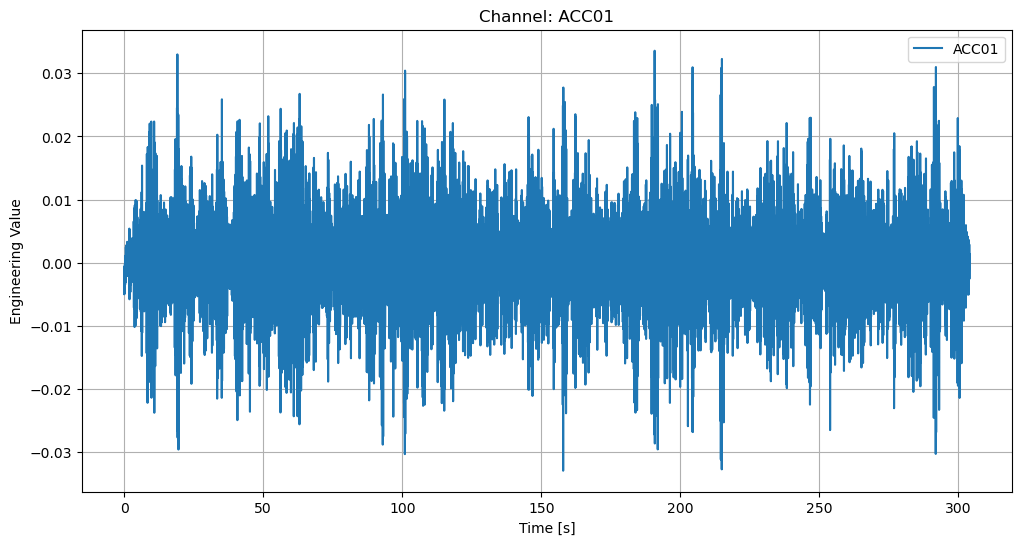

In [41]:
channel_to_plot = df.columns[0]  # Default to the first channel

plt.figure(figsize=(12, 6))
plt.plot(df[channel_to_plot], label=channel_to_plot)
plt.title(f"Channel: {channel_to_plot}")
plt.xlabel("Time [s]")
plt.ylabel("Engineering Value")
plt.legend()
plt.grid()
plt.show()